In [1]:
import os
import anndata
import sys
import numpy as np
wd = '/home/clarice/Documents/SingleCell_PseudoTime/'
os.chdir(wd)
sys.path.append('extras/Stabilized_ICA') # please download from https://github.com/ncaptier/Stabilized_ICA

In [2]:
sces = anndata.read_loom('data/CHLA9.loom')
sces.var_names_make_unique()

#-- Hack to make this work (need to figure out why it fails with sparse matrix when importing from loom)
sces = anndata.AnnData(X = sces.X.toarray(), obs = sces.obs, var = sces.var)
sces.obs['total_counts'] = sces.obs['TotalUMIs']

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [3]:
import scycle as cc
sces_raw = sces.copy()

#-- Pre-process
cc.pp.prep_pooling(sces)
cc.pp.score_cell_cycle(sces)
#-- Dimensionality reduction and finding cell cycle space
cc.tl.dimensionality_reduction(sces, method = 'ica')
cc.tl.enrich_components(sces)

Preparing embedding...
3823 samples pass the count filter
4599  samples pass the mt filter
Samples selected 3746


/home/clarice/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


Embedding for pooling...
Pooling 3746 samples...


/home/clarice/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


-- Scoring G1 genes...
-- Scoring S-phase...
-- Scoring G2-M...


/home/clarice/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/clarice/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


-- Scoring Histones...
Found histone genes: H4C3 H2AZ1 H3-3B H1-5 H1-3 H1-10 H1-2 H1-4 H2AZ2 H2AX H1-0 H2AC20 H3-3A H3C2 H2AC12 H2AJ H2BC4 H2AC16 H4C11 H3C13 H2AC14 H2BC5 H2AC15 H2AW H2AC8 H2BC6 H2AC6 H2AC21 H2AC17 H2BC15 H19 H3C3 H2BC19P H3C11 H3C12 H2BC13 H4C14 H4C8
-- Scalling signatures...
-- Dimensionality reduction using ICA...


/home/clarice/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


-- Done
--- Selected components:
G1/S: 0
G2/M: 7
G2/M-: 5
Histones: 3


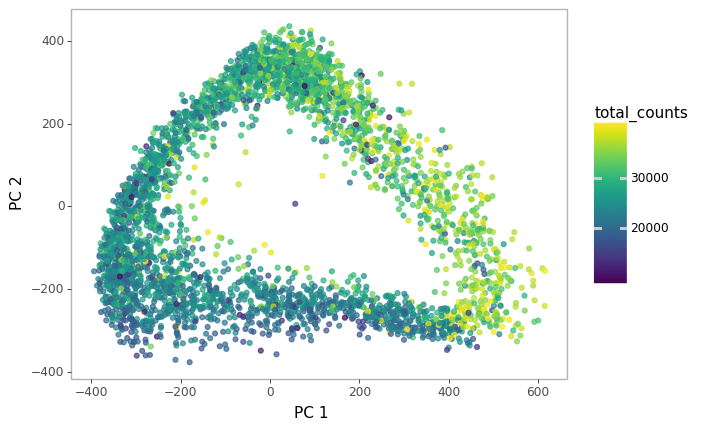

<ggplot: (8745729032973)>

In [4]:
#-- Plot cell cycle circle
cc.pl.scatter_projection(sces)

In [5]:
cc.tl.principal_circle(sces)

The initial number of nodes must be at least 3. This will be fixed
Generating the initial configuration
Creating a circle in the plane induced by the 1st and 2nd PCs with 3 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Subset 1 of 1
Performing PCA
Using standard PCA
4 dimensions are being used
100.0 % of the original variance has been retained
The elastic matrix is being used. Edge configuration will be ignored
Computing EPG with  30  nodes on  3746  points and  4  dimensions
BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

0||4	67683.7517	4	4	4	0	0	0	45605.8433	42164.8181	0.6581	0.6839	3517.2416	18560.6668	74242.6672	296970.6689	0
0||5	54693.1444	5	5	5	0	0	0	35375.4715	31660.5288	0.7348	0.7626	4068.4323	15249.2405	76246.2027	381231.0136	0
0||6	44013.7166	6	6	6	0	0	0	27674.4003	23858.5822	0.7925	0.8211	4411.4712	11927.8451	71567.0708	429402.4248	0
0||7	37780.6343	7	7	7	0	0	0	23966.5986	20

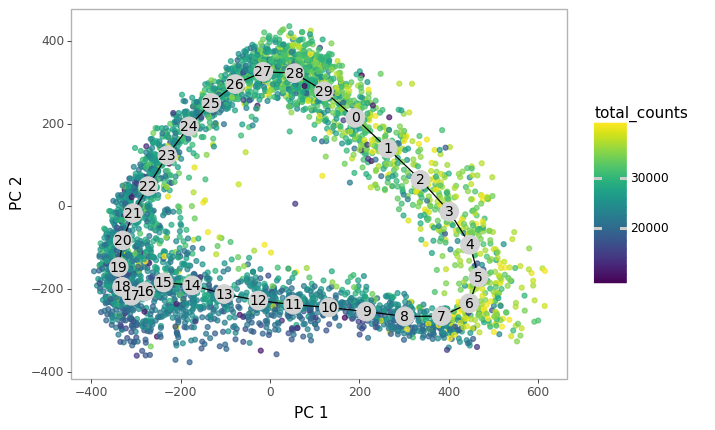

<ggplot: (8745727783033)>

In [6]:
cc.pl.scatter_projection(sces, trajectory = True)

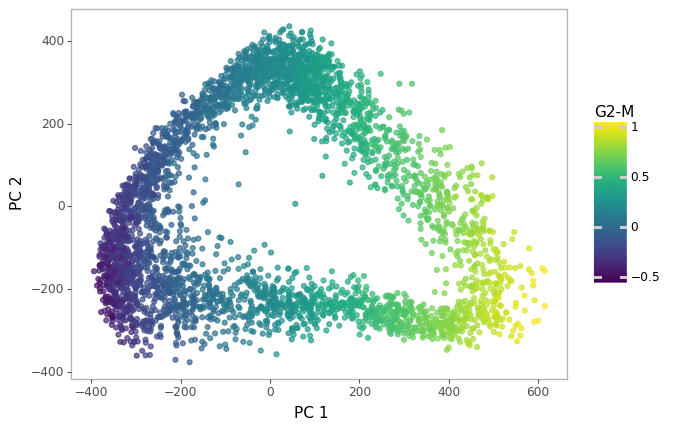

<ggplot: (8745726079053)>

In [7]:
cc.pl.scatter_projection(sces, "G2-M") # you can plot other things. See the help file for cc.pl.scatter_projection

In [8]:
cc.tl.celldiv_moment(sces)

Suggested moment of cell division: [6 7]
Direction of cell cycle: 1


In [9]:
cc.tl.remap_nodes(sces) # this will remap node 11 to 0 (i.e. moment after cell division)

Remapping edges using [6 7] ...


In [10]:
cc.tl.pseudotime(sces, remap_border = True)

Calculating pseudotimes for each cell...


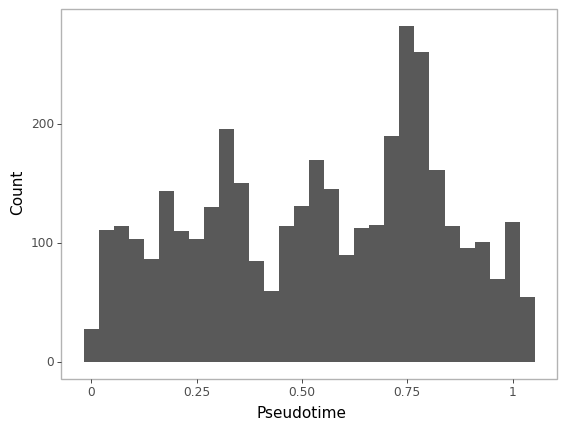

<ggplot: (8745725958061)>

In [11]:
cc.pl.hist_pseudotime(sces)

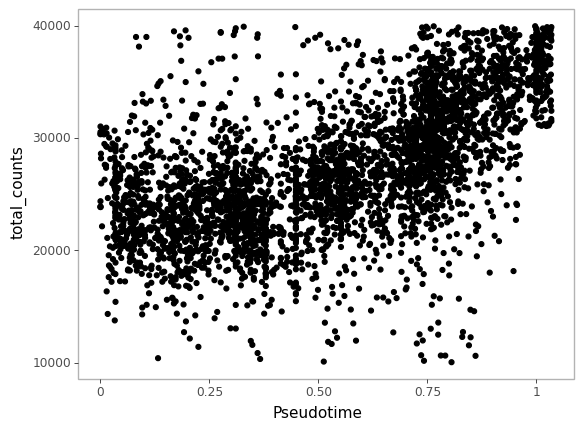

<ggplot: (8745802530317)>

In [12]:
cc.pl.scatter_pseudotime(sces, y = 'total_counts')

/home/clarice/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


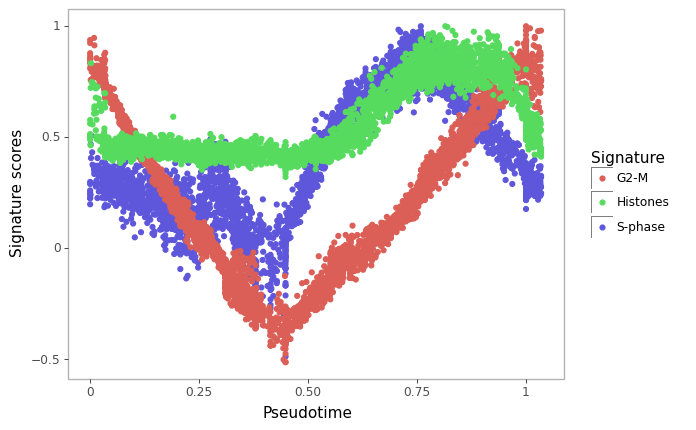

<ggplot: (8745726080997)>

In [13]:
cc.pl.scatter_cell_cycle(sces)

In [21]:
cc.tl.cell_cycle_phase(sces) # NOTE: we're still working on this. 
# You can manually override these 'suggested' things

(30, 4)
-- Suggested cell cycle division:
G1:  0   - 0.3333333333333333
S:  0.3333333333333333 - 0.43333333333333335
G2: 0.43333333333333335 - 0.7333333333333333
M:  0.7333333333333333 -   1


/home/clarice/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/clarice/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:464: PlotnineWarning: geom_vline : Removed 1 rows containing missing values.


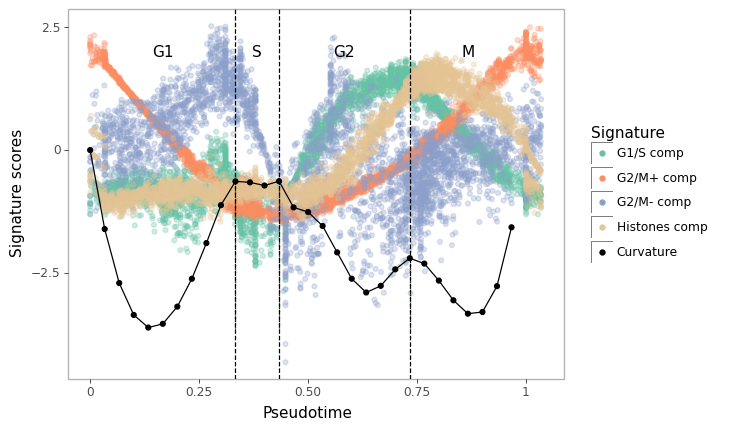

<ggplot: (8745723296137)>

In [22]:
cc.pl.scatter_cell_cycle(sces, scores = 'components', alpha = 0.3)

In [23]:
cc.tl.annotate_cell_cycle(sces, s_start = 0.43, g2_start = 0.73333, m_start = 0.95) # manual override

/home/clarice/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/clarice/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:464: PlotnineWarning: geom_vline : Removed 1 rows containing missing values.


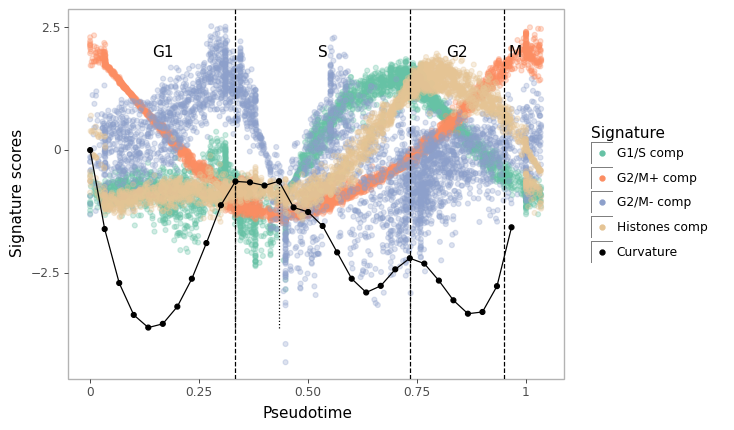

<ggplot: (8745723705833)>

In [24]:
cc.pl.scatter_cell_cycle(sces, scores = 'components', alpha = 0.3)

/home/clarice/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


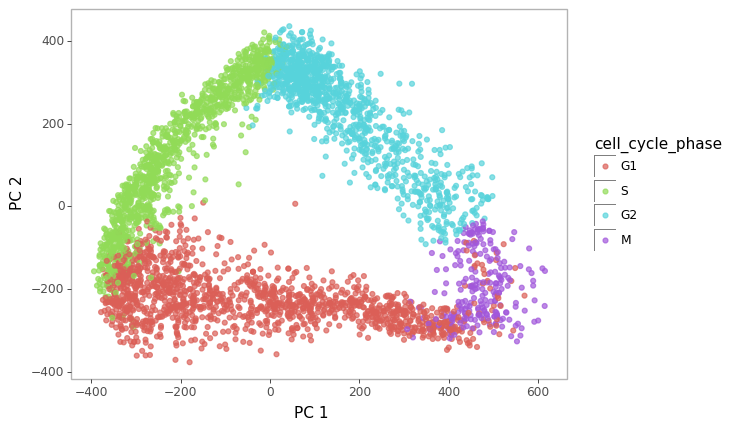

<ggplot: (8745722656641)>

In [25]:
cc.pl.scatter_projection(sces, 'cell_cycle_phase')

/home/clarice/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


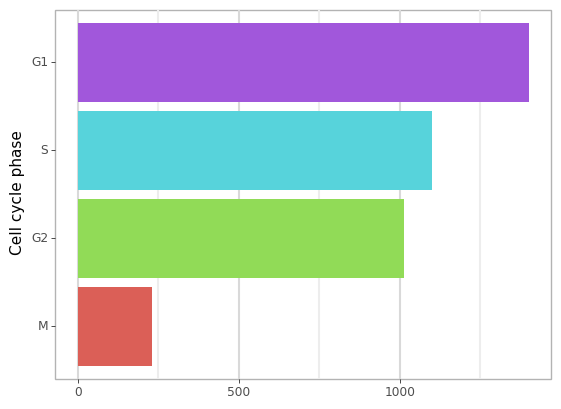

<ggplot: (8745722772849)>

In [26]:
cc.pl.barplot_cycle_phase(sces)